In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
import datetime as datetime
import glob
 
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

#import warnings
#warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
eci = pd.read_csv('Entrenamieto_ECI_2020.csv')

In [15]:
Germany = eci[eci['Territory'] == 'Germany']
Germany = Germany[Germany['Pricing, Delivery_Terms_Approved'] == 1]
Germany.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
69,17590,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2017,NaT,1,EUR,"549,780.00",EUR,"549,780.00",Closed Lost,Prod_Category_A_None
79,18279,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q2,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
80,18274,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q3,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
129,5042,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/15/2015,...,Q2,2016,NaT,20,EUR,"9,809,800.00",EUR,"9,809,800.00",Closed Lost,Prod_Category_A_None
374,8326,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,1/7/2016,...,Q2,2016,NaT,8,EUR,"4,375,800.00",EUR,"4,375,800.00",Closed Lost,Prod_Category_A_None
402,23254,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,10/1/2014,...,Q2,2016,NaT,0,EUR,"152,490.00",EUR,"152,490.00",Closed Lost,Prod_Category_A_None
403,17926,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2016,NaT,1,EUR,"744,120.00",EUR,"744,120.00",Closed Lost,Prod_Category_A_None
404,16008,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2016,NaT,3,EUR,"1,614,990.00",EUR,"1,614,990.00",Closed Lost,Prod_Category_A_None
444,17486,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q3,2016,NaT,0,EUR,"175,950.00",EUR,"175,950.00",Closed Won,Prod_Category_A_None
575,12764,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q2,2016,NaT,1,EUR,"492,468.75",EUR,"492,468.75",Closed Lost,Prod_Category_A_None


In [16]:
GermanyWon = Germany[Germany['Stage'] == 'Closed Won']
GermanyWon.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
79,18279,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q2,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
80,18274,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q3,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
444,17486,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q3,2016,NaT,0,EUR,"175,950.00",EUR,"175,950.00",Closed Won,Prod_Category_A_None
668,13997,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"84,000.00",EUR,"84,000.00",Closed Won,Prod_Category_A_None
673,5600,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,1/2/2017,...,Q1,2017,NaT,1,EUR,"235,659.38",EUR,"235,659.38",Closed Won,Prod_Category_A_None
748,14986,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"86,100.00",EUR,"86,100.00",Closed Won,Prod_Category_A_None
778,18061,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"92,437.50",EUR,"249,562.50",Closed Won,Prod_Category_A_None
779,18064,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"84,000.00",EUR,"249,562.50",Closed Won,Prod_Category_A_None
780,18068,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"73,125.00",EUR,"249,562.50",Closed Won,Prod_Category_A_None
821,4868,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/14/2016,...,Q1,2017,NaT,1,EUR,"287,525.00",EUR,"287,525.00",Closed Won,Prod_Category_A_None


In [17]:
GermanyWonEUR = GermanyWon[GermanyWon['Total_Amount_Currency'] == 'EUR']
GermanyWonEUR.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
79,18279,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q2,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
80,18274,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/20/2013,...,Q3,2016,NaT,20,EUR,"9,937,200.00",EUR,"19,874,400.00",Closed Won,Prod_Category_A_None
444,17486,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q3,2016,NaT,0,EUR,"175,950.00",EUR,"175,950.00",Closed Won,Prod_Category_A_None
668,13997,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"84,000.00",EUR,"84,000.00",Closed Won,Prod_Category_A_None
673,5600,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,1/2/2017,...,Q1,2017,NaT,1,EUR,"235,659.38",EUR,"235,659.38",Closed Won,Prod_Category_A_None
748,14986,EMEA,Germany,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"86,100.00",EUR,"86,100.00",Closed Won,Prod_Category_A_None
778,18061,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"92,437.50",EUR,"249,562.50",Closed Won,Prod_Category_A_None
779,18064,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"84,000.00",EUR,"249,562.50",Closed Won,Prod_Category_A_None
780,18068,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,...,Q1,2017,NaT,0,EUR,"73,125.00",EUR,"249,562.50",Closed Won,Prod_Category_A_None
821,4868,EMEA,Germany,1,1,1,1,0,Bureaucratic_Code_4,12/14/2016,...,Q1,2017,NaT,1,EUR,"287,525.00",EUR,"287,525.00",Closed Won,Prod_Category_A_None


In [18]:
GermanyQuarters = GermanyWonEUR.groupby(['Delivery_Year','Delivery_Quarter']).agg({'Pricing, Delivery_Terms_Approved':'sum'}).unstack()
GermanyQuarters.fillna(0)

Pricing, Delivery_Terms_Approved                       \
Delivery_Quarter                               Q1                   Q2   
Delivery_Year                                                            
2016                                         2.00                22.00   
2017                                        48.00               113.00   
2018                                        30.00                55.00   
2019                                        19.00                 0.00   

                                                            
Delivery_Quarter                   Q3                   Q4  
Delivery_Year                                               
2016                            26.00                41.00  
2017                            37.00                15.00  
2018                            52.00                93.00  
2019                             0.00                 0.00

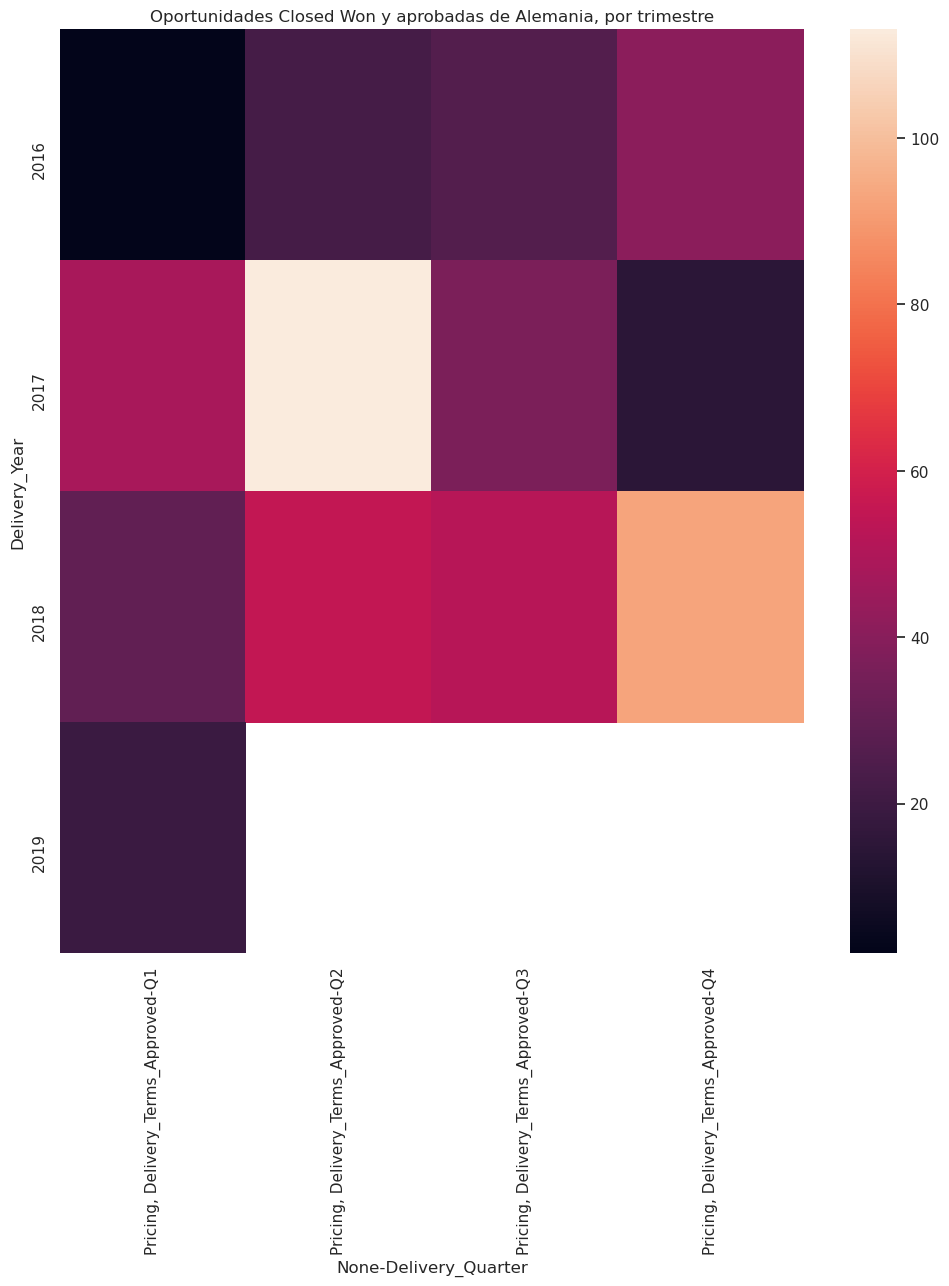

In [145]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax.set_title('Oportunidades Closed Won y aprobadas de Alemania, por trimestre')
sns.heatmap(GermanyQuarters,ax = ax)

In [25]:
productos = eci.groupby('Product_Name')['Stage'].value_counts().to_frame()
productos = productos.unstack()
productos.columns = ['Closed Lost','Closed Won','Negotiation','Proposal','Qualification']
productos = productos.fillna(0).nlargest(20, 'Closed Won')
productos.head(10)

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Product_Name,,,,,
Product_Name_226,159.00,677.00,0.00,0.00,0.00
Product_Name_100,401.00,575.00,0.00,0.00,0.00
Product_Name_231,145.00,432.00,1.00,0.00,1.00
Product_Name_192,75.00,367.00,0.00,0.00,0.00
Product_Name_491,173.00,351.00,0.00,0.00,0.00
Product_Name_4,167.00,307.00,0.00,0.00,0.00
Product_Name_111,109.00,279.00,0.00,0.00,0.00
Product_Name_495,71.00,279.00,0.00,0.00,0.00
Product_Name_167,63.00,270.00,0.00,0.00,0.00


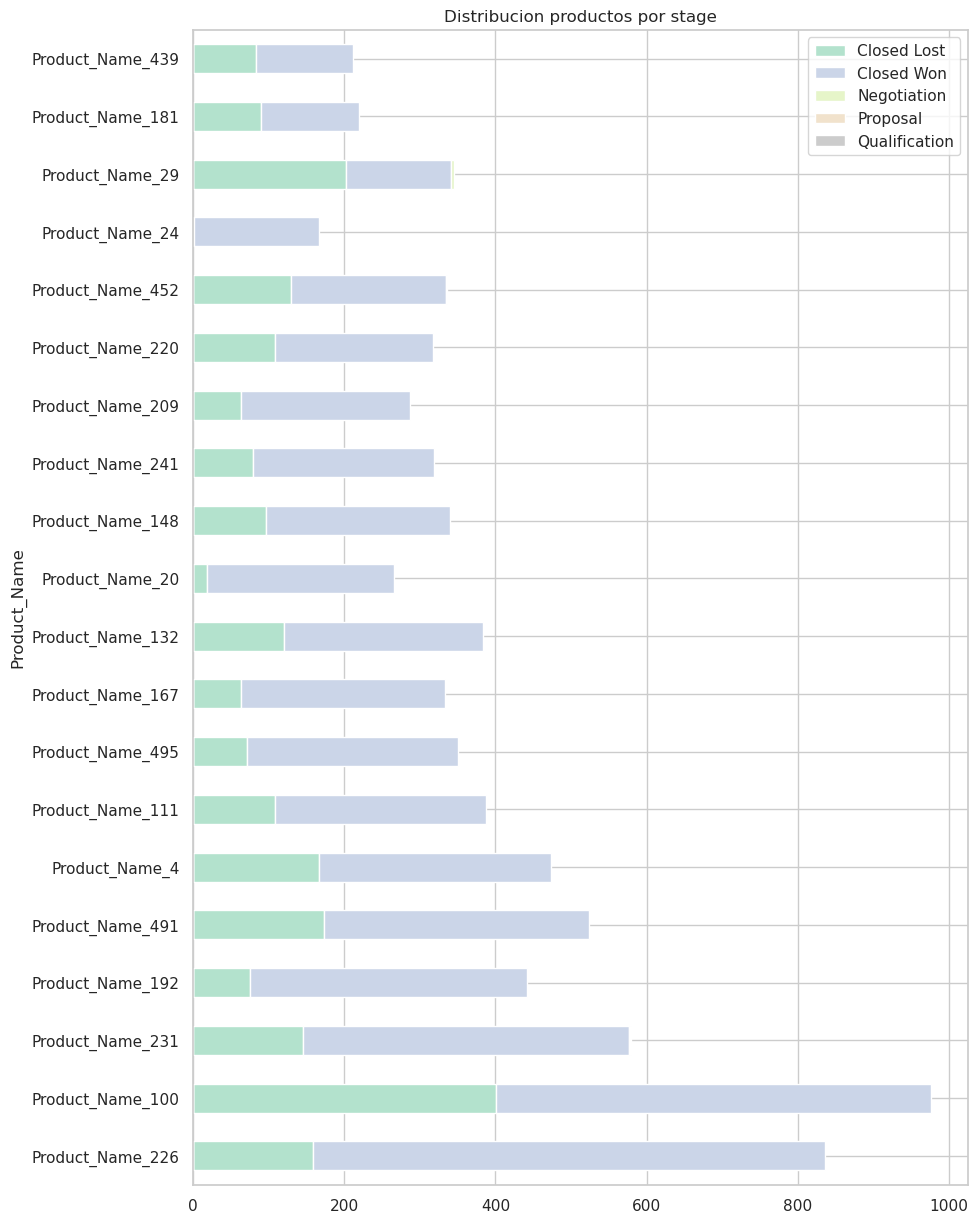

In [26]:
productos.plot.barh(stacked = True, colormap='Pastel2', title='Distribucion productos por stage',figsize =(10,15))

In [137]:
productosYear = eci.groupby('Product_Name')['Delivery_Year'].value_counts().to_frame()
productosYear = productosYear.unstack()
productosYear.columns = ['2016','2017','2018','2019','2020']
productosYear = productosYear.fillna(0).nlargest(20,'2019')
productosYear.head(30)

,2016,2017,2018,2019,2020
Product_Name,,,,,
Product_Name_231,0.00,262.00,275.00,42.00,0.00
Product_Name_445,0.00,33.00,51.00,31.00,0.00
Product_Name_241,0.00,1.00,295.00,23.00,0.00
Product_Name_322,0.00,0.00,44.00,16.00,1.00
Product_Name_432,0.00,50.00,44.00,15.00,0.00
Product_Name_29,2.00,28.00,302.00,13.00,0.00
Product_Name_448,1.00,7.00,108.00,13.00,2.00
Product_Name_488,0.00,0.00,0.00,10.00,0.00
Product_Name_315,0.00,0.00,0.00,9.00,0.00


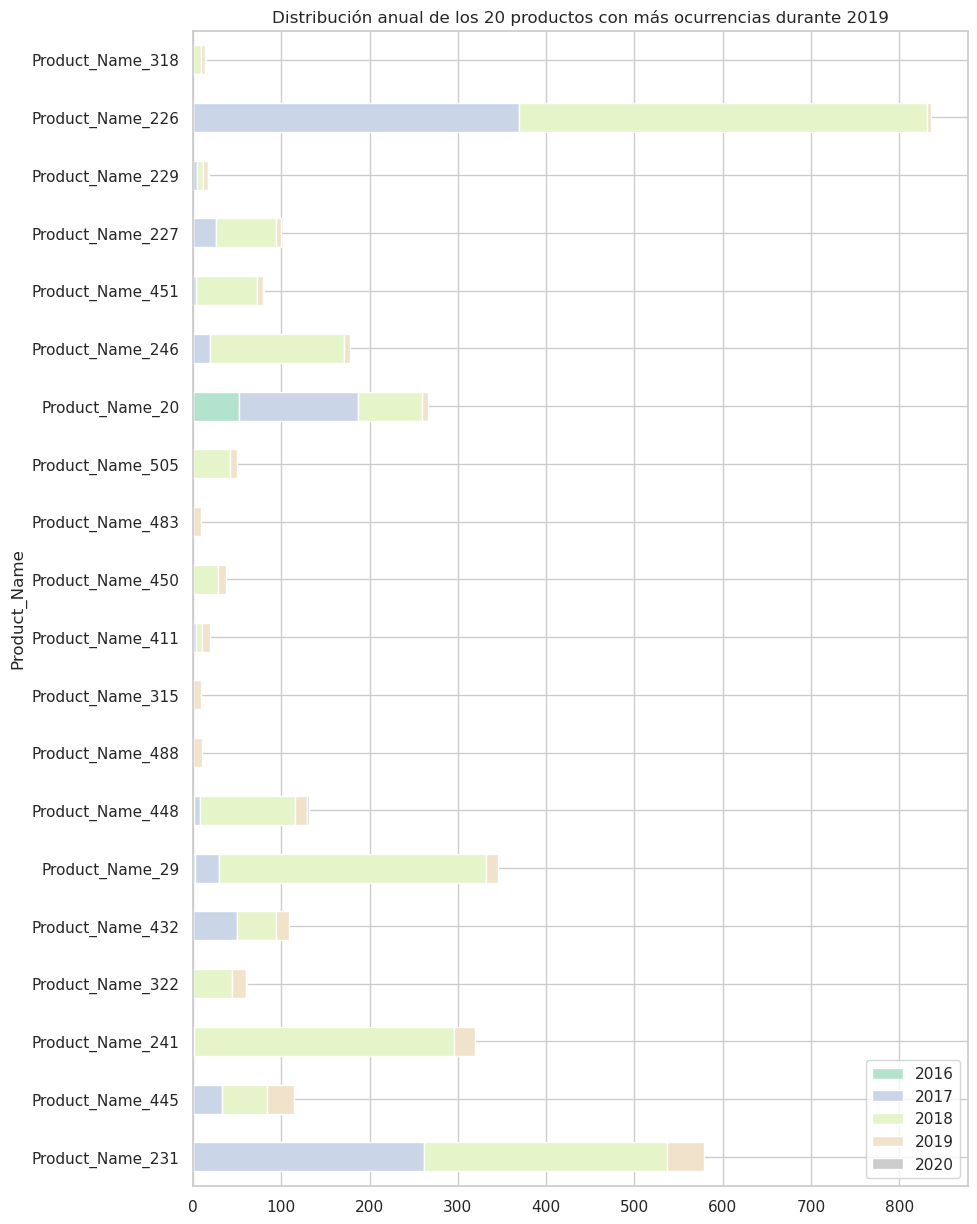

In [138]:
productosYear.plot.barh(stacked = True, colormap='Pastel2', title='Distribución anual de los 20 productos con más ocurrencias durante 2019',figsize =(10,15))

In [8]:
Japan = eci[eci['Region'] == 'Japan']
Japan = Japan[Japan['Pricing, Delivery_Terms_Approved'] == 1]
Japan.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
65,24444,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,4/20/2015,...,Q1,2016,NaT,0,JPY,"243,360.00",JPY,"243,360.00",Closed Won,Prod_Category_A_None
188,27724,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,6/15/2015,...,Q1,2016,NaT,0,JPY,"429,000.00",JPY,"429,000.00",Closed Won,Prod_Category_A_None
189,27725,Japan,Japan,1,1,1,1,0,Bureaucratic_Code_4,6/15/2015,...,Q1,2016,NaT,0,JPY,"478,125.00",JPY,"478,125.00",Closed Won,Prod_Category_A_None
195,19138,Japan,Japan,1,1,1,1,0,Bureaucratic_Code_4,8/11/2013,...,Q1,2016,NaT,0,JPY,"9,900,000.00",JPY,"9,900,000.00",Closed Won,Prod_Category_A_None
196,19082,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,8/11/2013,...,Q1,2016,NaT,0,JPY,"34,000.00",JPY,"390,050.00",Closed Won,Prod_Category_A_None
197,19085,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,8/11/2013,...,Q1,2016,NaT,0,JPY,"26,000.00",JPY,"390,050.00",Closed Won,Prod_Category_A_None
198,19089,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,8/11/2013,...,Q1,2016,NaT,0,JPY,"1,200.00",JPY,"390,050.00",Closed Won,Prod_Category_A_None
199,19092,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,8/11/2013,...,Q1,2016,NaT,0,JPY,"6,200.00",JPY,"390,050.00",Closed Won,Prod_Category_A_None
200,19095,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,8/11/2013,...,Q1,2016,NaT,0,JPY,"1,050.00",JPY,"390,050.00",Closed Won,Prod_Category_A_None
201,19099,Japan,Japan,1,1,0,0,0,Bureaucratic_Code_4,8/11/2013,...,Q1,2016,NaT,0,JPY,"1,600.00",JPY,"390,050.00",Closed Won,Prod_Category_A_None


In [13]:
JapanWon = Japan[Japan['Stage'] == 'Closed Won']
JapanQuarters = JapanWon.groupby(['Delivery_Year','Delivery_Quarter']).agg({'Pricing, Delivery_Terms_Approved':'sum'}).unstack()
JapanQuarters.fillna(0).head(10)

Pricing, Delivery_Terms_Approved                       \
Delivery_Quarter                               Q1                   Q2   
Delivery_Year                                                            
2016                                       223.00               210.00   
2017                                       364.00               319.00   
2018                                       148.00               294.00   
2019                                        12.00                 0.00   

                                                            
Delivery_Quarter                   Q3                   Q4  
Delivery_Year                                               
2016                           215.00               290.00  
2017                           305.00               513.00  
2018                            96.00               108.00  
2019                             0.00                 0.00

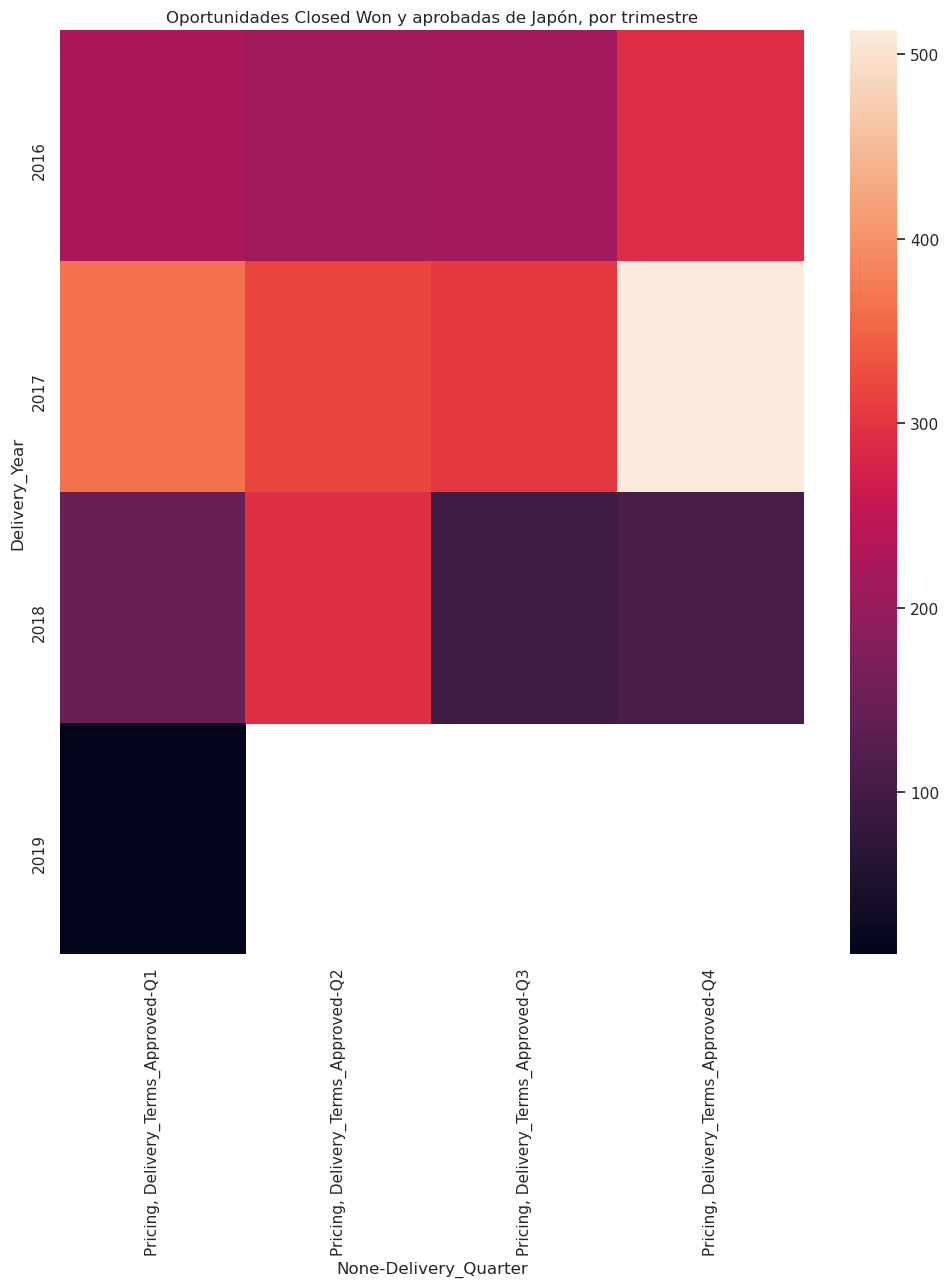

In [19]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax.set_title('Oportunidades Closed Won y aprobadas de Japón, por trimestre')
sns.heatmap(JapanQuarters,ax = ax)

In [143]:
precios = eci[['Product_Name','Price']]
precios = precios[precios['Price'] != 'Other']
precios = precios[precios['Price'] != 'None']
precios.sort_values(by = 'Price', ascending = False, inplace = True)
precios.drop_duplicates(subset=['Product_Name'], inplace=True)
precios = pd.to_numeric(precios.Price, errors = 'coerce')
precios = precios.nlargest(15,"first")
precios

12685                   0.56
12684                   0.56
10900                   0.55
15501                   0.52
15500                   0.52
7617                    0.51
12730                   0.49
11757                   0.48
14048                   0.47
12315                   0.47
11843                   0.47
13806                   0.45
13807                   0.45
6596                    0.45
11237                   0.45
Name: Price, dtype: float64

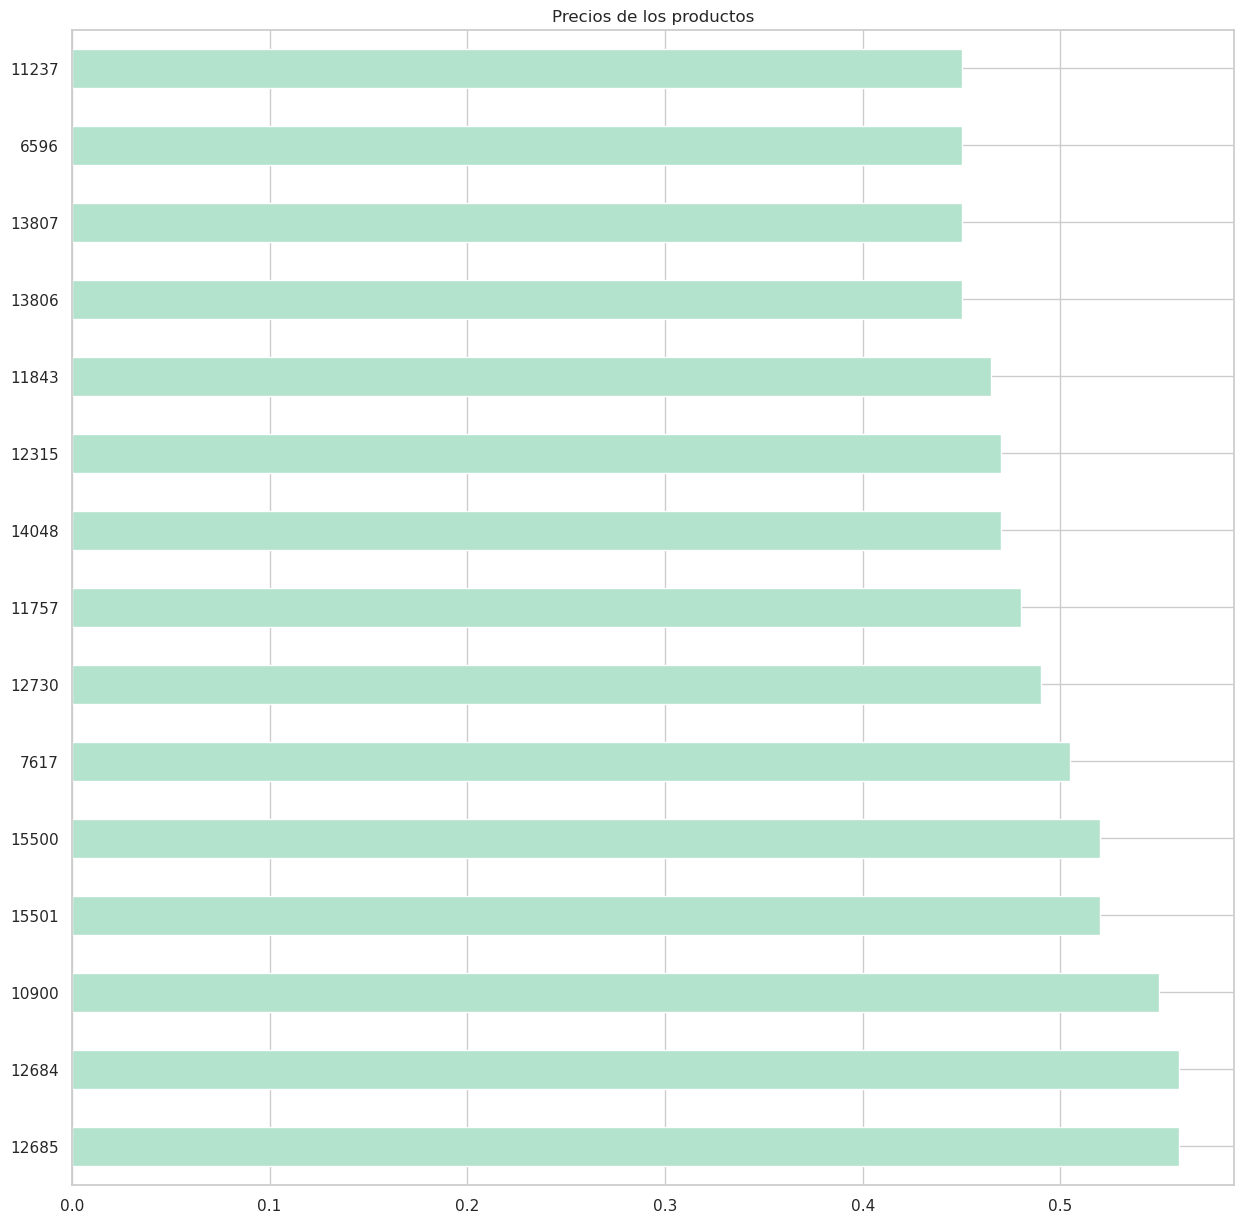

In [135]:
precios.plot.barh(stacked = True, colormap='Pastel2', title='Precios de los productos',figsize =(15,15))